https://www.wakari.io/sharing/bundle/emayorga/pyoos_ioos_sos_demo1

# Using Pyoos to access Axiom 52North IOOS SOS "Stable Demo"
## Examine the offerings; then query, parse and examine a "network offering" (all stations)
Use the same approach to access time series data from an ncSOS end point and a 52North IOOS SOS end point (the Axiom stable demo). ncSOS can only return one station in the response, while 52North SOS can return multiple stations when a network-offering request is made.  
Emilio Mayorga, 2/12/2014   
(2/20/2014: Updated bundled Wakari environment to pyoos 0.6)

In [1]:
from datetime import datetime, timedelta
import pandas as pd
from pyoos.collectors.ioos.swe_sos import IoosSweSos

In [2]:
# convenience function to build record style time series representation
def flatten_element(p):
    rd = {'time':p.time}
    for m in p.members:
        rd[m['standard']] = m['value']
    return rd

## 52N IOOS SOS Stable Demo -- network offering (multi-station) data request
### Create pyoos "collector" that connects to the SOS end point and parses GetCapabilities (offerings)

In [3]:
url52n = 'http://ioossos.axiomalaska.com/52n-sos-ioos-stable/sos/kvp'
collector52n = IoosSweSos(url52n)
offerings52n = collector52n.server.offerings

In [4]:
# Examine the first offering
of0 = offerings52n[0]
of0.id, of0.name, of0.begin_position, of0.end_position, of0.observed_properties, of0.procedures

('urn_ioos_network_test_all',
 'urn:ioos:network:test:all',
 datetime.datetime(2014, 2, 17, 2, 0, tzinfo=tzutc()),
 datetime.datetime(2014, 2, 17, 21, 0, tzinfo=tzutc()),
 ['http://mmisw.org/ont/cf/parameter/air_temperature',
  'http://mmisw.org/ont/cf/parameter/sea_water_temperature'],
 ['urn:ioos:network:test:all'])

In [5]:
# Examine the second offering
of1 = offerings52n[1]
of1.id, of1.name, of1.begin_position, of1.end_position, of1.observed_properties, of1.procedures

('urn_ioos_station_test_0',
 'urn:ioos:station:test:0',
 datetime.datetime(2014, 2, 17, 2, 0, tzinfo=tzutc()),
 datetime.datetime(2014, 2, 17, 21, 0, tzinfo=tzutc()),
 ['http://mmisw.org/ont/cf/parameter/air_temperature',
  'http://mmisw.org/ont/cf/parameter/sea_water_temperature'],
 ['urn:ioos:station:test:0'])

In [6]:
vars(of1)

{'_root': <Element {http://www.opengis.net/sos/1.0}ObservationOffering at 0x49a2e10>,
 'bbox': (-20.642194837840215,
  79.51324884461542,
  -20.642194837840215,
  79.51324884461542),
 'bbox_srs': <owslib.crs.Crs at 0x49b4210>,
 'begin_position': datetime.datetime(2014, 2, 17, 2, 0, tzinfo=tzutc()),
 'description': None,
 'end_position': datetime.datetime(2014, 2, 17, 21, 0, tzinfo=tzutc()),
 'features_of_interest': ['urn:ioos:station:test:0',
  'urn:ioos:station:test:0(height-10.0m)',
  'urn:ioos:station:test:0(height-15.0m)',
  'urn:ioos:station:test:0(height-20.0m)',
  'urn:ioos:station:test:0(height-25.0m)',
  'urn:ioos:station:test:0(height-30.0m)',
  'urn:ioos:station:test:0(height-35.0m)',
  'urn:ioos:station:test:0(height-40.0m)',
  'urn:ioos:station:test:0(height-45.0m)',
  'urn:ioos:station:test:0(height-5.0m)',
  'urn:ioos:station:test:0(height-50.0m)',
  'urn:ioos:station:test:0(height-55.0m)',
  'urn:ioos:station:test:0(height-60.0m)',
  'urn:ioos:station:test:0(height-65.0

### Set up request filters (selections), issue "collect" request (GetObservation -- get time series data), and examine the response

In [7]:
# Use the network:test:all offering to query across all stations
# Set and apply filters, then "collect"
collector52n.start_time = of0.begin_position
collector52n.end_time   = of0.end_position
#collector52n.variables=of0.observed_properties   # 2 obsprops, each of a different feature type
# For now, query only the variable that returns timeSeries; pyoos can't handle timeSeriesProfile yet
collector52n.variables=['http://mmisw.org/ont/cf/parameter/air_temperature']
offeringname = ['urn:ioos:network:test:all']
respfrmt = 'text/xml; subtype="om/1.0.0/profiles/ioos_sos/1.0"'

In [8]:
obs52n=collector52n.collect(offerings=offeringname, responseFormat=respfrmt)
obs52n

In [9]:
# 'stations' should be a Paegan 'StationCollection' with list of Paegan 'Station' elements
stations=obs52n[0].feature
print 'Station Object:', type(stations)
print 'Feature Type:', obs52n[0].feature_type
print 'Number of station in StationCollection:', len(stations.elements)
# stations returned in the network offering response
stations.elements

Station Object: <class 'paegan.cdm.dsg.collections.station_collection.StationCollection'>
Feature Type: timeSeries
Number of station in StationCollection: 10


{'urn:ioos:station:test:0': <paegan.cdm.dsg.features.station.Station at 0x4a81c10>,
 'urn:ioos:station:test:1': <paegan.cdm.dsg.features.station.Station at 0x4b32b10>,
 'urn:ioos:station:test:2': <paegan.cdm.dsg.features.station.Station at 0x4b32c50>,
 'urn:ioos:station:test:3': <paegan.cdm.dsg.features.station.Station at 0x4b32d90>,
 'urn:ioos:station:test:4': <paegan.cdm.dsg.features.station.Station at 0x4b32ed0>,
 'urn:ioos:station:test:5': <paegan.cdm.dsg.features.station.Station at 0x4b32fd0>,
 'urn:ioos:station:test:6': <paegan.cdm.dsg.features.station.Station at 0x4b34190>,
 'urn:ioos:station:test:7': <paegan.cdm.dsg.features.station.Station at 0x4b342d0>,
 'urn:ioos:station:test:8': <paegan.cdm.dsg.features.station.Station at 0x4b34410>,
 'urn:ioos:station:test:9': <paegan.cdm.dsg.features.station.Station at 0x4b34550>}

In [10]:
# Examine one station; list its unique observed properties (variables) 
station52n_0 = stations.elements['urn:ioos:station:test:0']
station52n_0.get_unique_members()

[{'name': 'air_temperature',
  'standard': 'http://mmisw.org/ont/cf/parameter/air_temperature'}]

In [11]:
# List and show one data value element
station52n_0.elements[0].time, station52n_0.elements[0].members

(datetime.datetime(2014, 2, 17, 3, 0, tzinfo=tzutc()),
 [{'name': 'air_temperature',
   'standard': 'http://mmisw.org/ont/cf/parameter/air_temperature',
   'units': 'urn:ogc:def:uom:udunits:2:Cel',
   'value': 23.5}])

In [12]:
# Extract and parse units string
unitsraw = station52n_0.elements[0].members[0]['units']
units = unitsraw.split(':')[-1]
print unitsraw, '  |  ', units

urn:ogc:def:uom:udunits:2:Cel   |   Cel


### Read time series data for two stations, ingest into Pandas DataFrames, then create plots

In [13]:
# First station
flattened52n_0 = map(flatten_element, station52n_0.elements)
n52n_0df=pd.DataFrame.from_records(flattened52n_0, index=['time'])
n52n_0df.head()

,http://mmisw.org/ont/cf/parameter/air_temperature
time,
2014-02-17 03:00:00+00:00,23.50
2014-02-17 04:00:00+00:00,7.32
2014-02-17 05:00:00+00:00,11.29
2014-02-17 06:00:00+00:00,31.62
2014-02-17 07:00:00+00:00,30.92


In [14]:
# A second station
station52n_5 = stations.elements['urn:ioos:station:test:5']
flattened52n_5 = map(flatten_element, station52n_5.elements)
n52n_5df=pd.DataFrame.from_records(flattened52n_5, index=['time'])

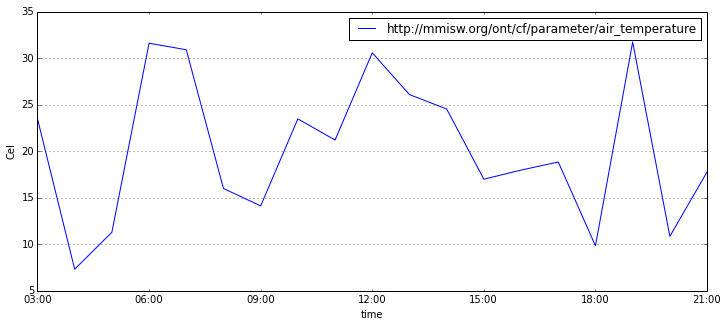

In [15]:
# Plot data from first station using plot method on DataFrame
# Note the datetime x-axis labels are much nicer here (pandas) 
# than on the next plot (bare matplotlib)
n52n_0df.plot(figsize(12,5))
ylabel(units);

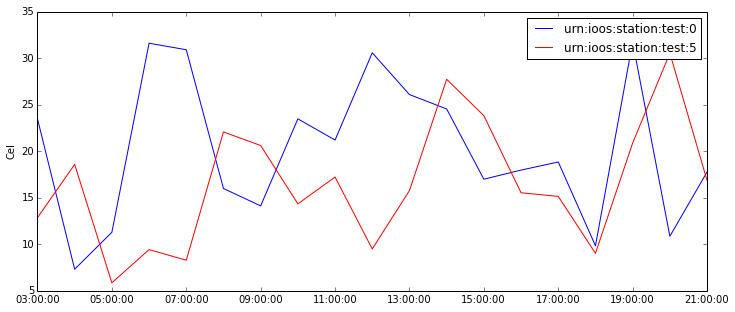

In [16]:
# Joint plot of time series from two stations in the network response, using matplotlib
op = n52n_0df.columns[0]
plot(n52n_0df.index, n52n_0df[op], '-b',
     n52n_5df.index, n52n_5df[op], '-r')
ylabel(units)
legend([station52n_0.uid, station52n_5.uid]);